# जेनेटिक एल्गोरिदम

यह नोटबुक [AI for Beginners Curriculum](http://github.com/microsoft/ai-for-beginners) का हिस्सा है।


In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import time

## कुछ सिद्धांत

**जेनेटिक एल्गोरिदम्स** (GA) एक **विकासवादी दृष्टिकोण** पर आधारित हैं, जिसमें जनसंख्या के विकास की विधियों का उपयोग करके किसी दिए गए समस्या का सर्वोत्तम समाधान प्राप्त किया जाता है। इन्हें 1975 में [जॉन हेनरी हॉलैंड](https://en.wikipedia.org/wiki/John_Henry_Holland) द्वारा प्रस्तावित किया गया था।

जेनेटिक एल्गोरिदम्स निम्नलिखित विचारों पर आधारित हैं:
* समस्या के वैध समाधान को **जीन** के रूप में प्रस्तुत किया जा सकता है।
* **क्रॉसओवर** हमें दो समाधानों को मिलाकर एक नया वैध समाधान प्राप्त करने की अनुमति देता है।
* **चयन** का उपयोग किसी **फिटनेस फंक्शन** के माध्यम से अधिक इष्टतम समाधान चुनने के लिए किया जाता है।
* **म्यूटेशन** को शामिल किया जाता है ताकि अनुकूलन को अस्थिर किया जा सके और स्थानीय न्यूनतम से बाहर निकला जा सके।

यदि आप एक जेनेटिक एल्गोरिदम लागू करना चाहते हैं, तो आपको निम्नलिखित की आवश्यकता होगी:

 * हमारे समस्या समाधान को **जीन** $g\in\Gamma$ का उपयोग करके कोड करने की विधि खोजें।
 * जीन के सेट $\Gamma$ पर **फिटनेस फंक्शन** $\mathrm{fit}: \Gamma\to\mathbb{R}$ को परिभाषित करें। छोटे फंक्शन मान बेहतर समाधान के अनुरूप होंगे।
 * दो जीन को मिलाकर एक नया वैध समाधान प्राप्त करने के लिए **क्रॉसओवर** तंत्र को परिभाषित करें $\mathrm{crossover}: \Gamma^2\to\Gamma$।
 * **म्यूटेशन** तंत्र को परिभाषित करें $\mathrm{mutate}: \Gamma\to\Gamma$।
कई मामलों में, क्रॉसओवर और म्यूटेशन जीन को संख्यात्मक अनुक्रम या बिट वेक्टर के रूप में हेरफेर करने के लिए काफी सरल एल्गोरिदम होते हैं।

जेनेटिक एल्गोरिदम का विशिष्ट कार्यान्वयन मामले से मामले में भिन्न हो सकता है, लेकिन इसकी समग्र संरचना निम्नलिखित है:

1. प्रारंभिक जनसंख्या का चयन करें $G\subset\Gamma$
2. इस चरण में प्रदर्शन किए जाने वाले ऑपरेशन को यादृच्छिक रूप से चुनें: क्रॉसओवर या म्यूटेशन
3. **क्रॉसओवर**:
  * दो जीन को यादृच्छिक रूप से चुनें $g_1, g_2 \in G$
  * क्रॉसओवर की गणना करें $g=\mathrm{crossover}(g_1,g_2)$
  * यदि $\mathrm{fit}(g)<\mathrm{fit}(g_1)$ या $\mathrm{fit}(g)<\mathrm{fit}(g_2)$ - तो जनसंख्या में संबंधित जीन को $g$ से बदल दें।
4. **म्यूटेशन** - यादृच्छिक रूप से एक जीन चुनें $g\in G$ और इसे $\mathrm{mutate}(g)$ से बदल दें।
5. चरण 2 से दोहराएं, जब तक कि $\mathrm{fit}$ का मान पर्याप्त रूप से छोटा न हो जाए, या चरणों की संख्या की सीमा तक न पहुंच जाए।

जेनेटिक एल्गोरिदम द्वारा आमतौर पर हल किए जाने वाले कार्य:
1. शेड्यूल अनुकूलन
1. इष्टतम पैकिंग
1. इष्टतम कटिंग
1. थकाऊ खोज को तेज करना


## समस्या 1: निष्पक्ष खजाने का बंटवारा

**कार्य**:  
दो लोगों को एक खजाना मिला है जिसमें अलग-अलग आकार (और, उसी के अनुसार, अलग-अलग कीमत) के हीरे हैं। उन्हें खजाने को इस तरह से दो हिस्सों में बांटना है कि कीमत में अंतर 0 (या न्यूनतम) हो।

**औपचारिक परिभाषा**:  
हमारे पास संख्याओं का एक सेट $S$ है। हमें इसे दो उपसेट $S_1$ और $S_2$ में विभाजित करना है, ताकि  
$$\left|\sum_{i\in S_1}i - \sum_{j\in S_2}j\right|\to\min$$  
और $S_1\cup S_2=S$, $S_1\cap S_2=\emptyset$ हो।

सबसे पहले, आइए सेट $S$ को परिभाषित करें:


In [3]:
N = 200
S = np.array([random.randint(1,10000) for _ in range(N)])
print(S)

[8344 2197 9335 3131 5863 9429 3818 9791   15 5455 1396 9538 4872 6549
 8587 5986 6021 9764 8102 5083 5739 7684 8498 3007 6599  820 7490 2372
 9370 5235 3525 3154  859 1906 8159 3950 2173 2988 2050  349 8713 2284
 4177 6033 1651 9176 5049 8201  171 5081 1216 3756 4711 2757 7738 1272
 5650 6584 5395 9004 7797  969 8104 1283 1392 4001 5768  445  274  256
 8239 8015 4381 9021 1189 8879 1411 3539 6526 8011  136 7230 2332  451
 5702 2989 4320 2446 9578 8486 4027 2410 9588 8981 2177 1493 3232 9151
 4835 5594 6859 8394  369 3200  126 4259 2283 7755 2014 2458 8327 8082
 7413 7622 1206 5533 8751 3495 5868 8472 6850 3958 3149 4672 4810 6274
 4700 6134 4627 4616 6656 9949  884 2256 7419 1926 7973 5319 5967 9158
 3823 7697 9466 5675 5412 9784 5426 8209 3421 1136 6047 4429 8001 4417
 1381  722 7350 6018 6235 7860 5853 7660 5937 6242    1 9552 3971 8302
 2633 9227 7283  154 8599 4269 9392 8539 1630  368 2409 9351 3838 9814
 6186 5743 5083 1325 1610  779 3643 3262 5768 8725  961 4611 6310 4788
 1648 

चलो समस्या के प्रत्येक संभावित समाधान को एक बाइनरी वेक्टर $B\in\{0,1\}^N$ द्वारा एन्कोड करें, जहाँ $i$-वें स्थान पर संख्या यह दर्शाती है कि मूल सेट $S$ में $i$-वीं संख्या किस सेट ($S_1$ या $S_2$) से संबंधित है। `generate` फ़ंक्शन उन रैंडम बाइनरी वेक्टरों को उत्पन्न करेगा।


In [5]:
def generate(S):
    return np.array([random.randint(0,1) for _ in S])

b = generate(S)
print(b)

[1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1
 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1
 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0
 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0]


अब `fit` फ़ंक्शन को परिभाषित करते हैं जो समाधान की "लागत" की गणना करता है। यह दो सेटों, $S_1$ और $S_2$ के योग के बीच का अंतर होगा:


In [6]:
def fit(B,S=S):
    c1 = (B*S).sum()
    c2 = ((1-B)*S).sum()
    return abs(c1-c2)

fit(b)

133784

अब हमें म्यूटेशन और क्रॉसओवर के लिए फंक्शन परिभाषित करने की आवश्यकता है:
* म्यूटेशन के लिए, हम एक रैंडम बिट चुनेंगे और उसे उलट देंगे (0 को 1 में और 1 को 0 में बदल देंगे)
* क्रॉसओवर के लिए, हम एक वेक्टर से कुछ बिट्स लेंगे और दूसरे वेक्टर से कुछ बिट्स लेंगे। हम उसी `generate` फंक्शन का उपयोग करेंगे ताकि यह रैंडमली तय कर सके कि इनपुट मास्क्स से कौन-कौन से बिट्स लिए जाएं।


In [7]:
def mutate(b):
    x = b.copy()
    i = random.randint(0,len(b)-1)
    x[i] = 1-x[i]
    return x

def xover(b1,b2):
    x = generate(b1)
    return b1*x+b2*(1-x)

चलो समाधानों की प्रारंभिक जनसंख्या $P$ को आकार `pop_size` के साथ बनाते हैं:


In [8]:
pop_size = 30
P = [generate(S) for _ in range(pop_size)]

अब, विकास प्रक्रिया को अंजाम देने के लिए मुख्य फ़ंक्शन। `n` वह संख्या है जो विकास के चरणों को दर्शाती है। प्रत्येक चरण में:
* 30% संभावना के साथ हम एक म्यूटेशन करते हैं, और सबसे खराब `fit` फ़ंक्शन वाले तत्व को म्यूटेटेड तत्व से बदल देते हैं
* 70% संभावना के साथ हम क्रॉसओवर करते हैं

यह फ़ंक्शन सबसे अच्छा समाधान (सबसे अच्छे समाधान से संबंधित जीन) और प्रत्येक पुनरावृत्ति में जनसंख्या में न्यूनतम फिट फ़ंक्शन का इतिहास लौटाता है।


In [9]:
def evolve(P,S=S,n=2000):
    res = []
    for _ in range(n):
        f = min([fit(b) for b in P])
        res.append(f)
        if f==0:
            break
        if random.randint(1,10)<3:
            i = random.randint(0,len(P)-1)
            b = mutate(P[i])
            i = np.argmax([fit(z) for z in P])
            P[i] = b
        else:
            i = random.randint(0,len(P)-1)
            j = random.randint(0,len(P)-1)
            b = xover(P[i],P[j])
            if fit(b)<fit(P[i]):
                P[i]=b
            elif fit(b)<fit(P[j]):
                P[j]=b
            else:
                pass
    i = np.argmin([fit(b) for b in P])
    return (P[i],res)

(s,hist) = evolve(P)
print(s,fit(s))

[0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0
 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1
 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0
 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1] 4


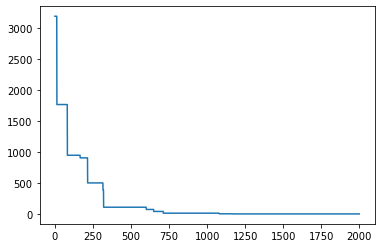

In [10]:
plt.plot(hist)
plt.show()

## समस्या 2: एन क्वीन्स समस्या

**कार्य**:
आपको $N$ क्वीन्स को $N\times N$ आकार के शतरंज बोर्ड पर इस तरह रखना है कि वे एक-दूसरे पर हमला न करें।

सबसे पहले, आइए इस समस्या को जेनेटिक एल्गोरिदम के बिना, पूर्ण खोज का उपयोग करके हल करें। हम बोर्ड की स्थिति को सूची $L$ द्वारा दर्शा सकते हैं, जहां सूची में $i$-वां नंबर $i$-वीं पंक्ति में क्वीन की क्षैतिज स्थिति है। यह काफी स्पष्ट है कि प्रत्येक समाधान में केवल एक क्वीन प्रति पंक्ति होगी, और प्रत्येक पंक्ति में एक क्वीन होगी।

हमारा लक्ष्य समस्या का पहला समाधान खोजना होगा, जिसके बाद हम खोज को रोक देंगे। आप इस फ़ंक्शन को आसानी से सभी संभावित क्वीन की स्थितियों को उत्पन्न करने के लिए विस्तारित कर सकते हैं।


In [11]:
N = 8

def checkbeats(i_new,j_new,l):
    for i,j in enumerate(l,start=1):
        if j==j_new:
            return False
        else:
            if abs(j-j_new) == i_new-i:
                return False
    return True

def nqueens(l,N=8,disp=True):
    if len(l)==N:
        if disp: print(l)
        return True
    else:
        for j in range(1,N+1):
            if checkbeats(len(l)+1,j,l):
                l.append(j)
                if nqueens(l,N,disp): return True
                else: l.pop()
        return False
            
nqueens([],8)


[1, 5, 8, 6, 3, 7, 2, 4]


True

अब आइए मापते हैं कि 20-क्वीन्स समस्या का समाधान प्राप्त करने में कितना समय लगता है:


In [12]:
%timeit nqueens([],20,False)

10.6 s ± 2.17 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


अब हम इसी समस्या को हल करने के लिए जेनेटिक एल्गोरिथ्म का उपयोग करेंगे। यह समाधान [इस ब्लॉग पोस्ट](https://kushalvyas.github.io/gen_8Q.html) से प्रेरित है।

हम प्रत्येक समाधान को $N$ लंबाई की उसी सूची द्वारा प्रस्तुत करेंगे, और एक `fit` फ़ंक्शन के रूप में हम उन रानियों की संख्या लेंगे जो एक-दूसरे पर हमला करती हैं:


In [13]:
def fit(L):
    x=0
    for i1,j1 in enumerate(L,1):
        for i2,j2 in enumerate(L,1):
            if i2>i1:
                if j2==j1 or (abs(j2-j1)==i2-i1): x+=1
    return x

In [14]:
def generate_one(N):
    x = np.arange(1,N+1)
    np.random.shuffle(x)
    return (x,fit(x))

def generate(N,NP):
    return [generate_one(N) for _ in range(NP)]

generate(8,5)

[(array([2, 3, 8, 7, 5, 4, 1, 6]), 4),
 (array([3, 4, 5, 1, 2, 8, 6, 7]), 8),
 (array([1, 3, 7, 4, 5, 8, 6, 2]), 6),
 (array([1, 5, 4, 6, 8, 3, 7, 2]), 4),
 (array([3, 5, 7, 1, 8, 6, 4, 2]), 3)]

In [15]:
def mutate(G):
    x=random.randint(0,len(G)-1)
    G[x]=random.randint(1,len(G))
    return G
    
def xover(G1,G2):
    x=random.randint(0,len(G1))
    return np.concatenate((G1[:x],G2[x:]))

xover([1,2,3,4],[5,6,7,8])

array([1, 2, 7, 8])

In [17]:
def choose_rand(P):
    N=len(P[0][0])
    mf = N*(N-1)//2 # max fitness fn
    z = [mf-x[1] for x in P]
    tf = sum(z) # total fitness
    w = [x/tf for x in z]
    p = np.random.choice(len(P),2,False,p=w)
    return p[0],p[1]

def choose(P):
    def ch(w):
        p=[]
        while p==[]:
            r = random.random()
            p = [i for i,x in enumerate(P) if x[1]>=r]
        return random.choice(p)
    N=len(P[0][0])
    mf = N*(N-1)//2 # max fitness fn
    z = [mf-x[1] for x in P]
    tf = sum(z) # total fitness
    w = [x/tf for x in z]
    p1=p2=0
    while p1==p2:
        p1 = ch(w)
        p2 = ch(w)
    return p1,p2

अब हम मुख्य विकासात्मक लूप को परिभाषित करेंगे। हम तर्क को पिछले उदाहरण से थोड़ा अलग बनाएंगे, ताकि यह दिखाया जा सके कि रचनात्मकता का उपयोग किया जा सकता है। हम तब तक लूप करेंगे जब तक हमें सही समाधान (fitness function=0) नहीं मिल जाता, और प्रत्येक चरण में हम वर्तमान पीढ़ी लेंगे और उसी आकार की नई पीढ़ी बनाएंगे। यह `nxgeneration` फ़ंक्शन का उपयोग करके निम्नलिखित चरणों के माध्यम से किया जाता है:

1. सबसे कम फिट समाधानों को हटा दें - इसके लिए `discard_unfit` फ़ंक्शन है जो यह काम करता है।
1. पीढ़ी में कुछ और रैंडम समाधान जोड़ें।
1. `gen_size` आकार की नई पीढ़ी को निम्नलिखित चरणों का उपयोग करके प्रत्येक नए जीन के लिए तैयार करें:
    - दो रैंडम जीन का चयन करें, फिटनेस फ़ंक्शन के अनुपात में संभावना के साथ।
    - एक क्रॉसओवर की गणना करें।
    - `mutation_prob` संभावना के साथ एक म्यूटेशन लागू करें।


In [20]:
mutation_prob = 0.1

def discard_unfit(P):
    P.sort(key=lambda x:x[1])
    return P[:len(P)//3]

def nxgeneration(P):
    gen_size=len(P)
    P = discard_unfit(P)
    P.extend(generate(len(P[0][0]),3))
    new_gen = []
    for _ in range(gen_size):
        p1,p2 = choose_rand(P)
        n = xover(P[p1][0],P[p2][0])
        if random.random()<mutation_prob:
            n=mutate(n)
        nf = fit(n)
        new_gen.append((n,nf))
        '''
        if (nf<=P[p1][1]) or (nf<=P[p2][1]):
            new_gen.append((n,nf))
        elif (P[p1][1]<P[p2][1]):
            new_gen.append(P[p1])
        else:
            new_gen.append(P[p2])
        '''
    return new_gen
    
def genetic(N,pop_size=100):
    P = generate(N,pop_size)
    mf = min([x[1] for x in P])
    n=0
    while mf>0:
        #print("Generation {0}, fit={1}".format(n,mf))
        n+=1
        mf = min([x[1] for x in P])
        P = nxgeneration(P)
    mi = np.argmin([x[1] for x in P])
    return P[mi]

genetic(8)

(array([4, 7, 5, 3, 1, 6, 8, 2]), 0)

In [19]:
%timeit genetic(10)

The slowest run took 18.71 times longer than the fastest. This could mean that an intermediate result is being cached.
26.4 s ± 28.7 s per loop (mean ± std. dev. of 7 runs, 1 loop each)



---

**अस्वीकरण**:  
यह दस्तावेज़ AI अनुवाद सेवा [Co-op Translator](https://github.com/Azure/co-op-translator) का उपयोग करके अनुवादित किया गया है। जबकि हम सटीकता सुनिश्चित करने का प्रयास करते हैं, कृपया ध्यान दें कि स्वचालित अनुवाद में त्रुटियां या अशुद्धियां हो सकती हैं। मूल भाषा में उपलब्ध मूल दस्तावेज़ को प्रामाणिक स्रोत माना जाना चाहिए। महत्वपूर्ण जानकारी के लिए, पेशेवर मानव अनुवाद की सिफारिश की जाती है। इस अनुवाद के उपयोग से उत्पन्न किसी भी गलतफहमी या गलत व्याख्या के लिए हम जिम्मेदार नहीं हैं।
